In [1]:
import pickle
import pandas as pd
import gzip
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [2]:
def LoadTokensDF_Pickle(fileName):
    df = pd.read_pickle(fileName, compression='gzip')
    return df

#lemmatized column to string column
def lemmatized_strs(dataframe):
    length = len(dataframe["lemmatized_tokens"])
    strs=[]
    for i in range(length):    
        words = dataframe["lemmatized_tokens"].iloc[i]
        sentence = " ".join(words)
        strs.append(sentence)
    dataframe["lemmatized_tokens_str"] = pd.Series(strs)
    return dataframe

In [3]:
ThyroidCancer_DF = LoadTokensDF_Pickle("ThyroidCancer_DF_Tokens_Cleaned_Lemmatized_merged_fixed_gzip_pkl")
Leukemia_DF = LoadTokensDF_Pickle("Leukemia_DF_Tokens_Cleaned_Lemmatized_merged_fixed_gzip_pkl")
NonHodgkinLymphoma_DF = LoadTokensDF_Pickle("NonHodgkinLymphoma_DF_Tokens_Cleaned_Lemmatized_merged_fixed_gzip_pkl")
BladderCancer_DF = LoadTokensDF_Pickle("BladderCancer_DF_Tokens_Cleaned_Lemmatized_merged_fixed_gzip_pkl")

In [4]:
ThyroidCancer_DF

,index,pubmedId,title,abstract,class,tokens,lemmatized_tokens
0,1,35751867,Fumarate hydratase is a novel gene for familia...,the majority of cases of epithelial cell-deriv...,ThyroidCancer,"[the, majority, of, cases, of, epithelial, cel...","[majority, case, epithelial, cell-derived, thy..."
1,2,35751777,Levothyroxine-induced serum free thyroxine res...,Patients undergoing thyroidectomy for differen...,ThyroidCancer,"[patients, undergoing, thyroidectomy, for, dif...","[patient, undergo, thyroidectomy, differentiat..."
2,3,35748311,Persistent post-thyroidectomy hypoparathyroidi...,The reported incidence of persistent hypoparat...,ThyroidCancer,"[the, reported, incidence, of, persistent, hyp...","[report, incidence, persistent, hypoparathyroi..."
3,4,35748101,BRAF V600E protect from cell death via inhibit...,BRAF T1799A mutation is the most common geneti...,ThyroidCancer,"[braf, t1799a, mutation, is, the, most, common...","[braf, t1799a, mutation, common, genetic, vari..."
4,5,35747011,Genetic Panel Test of Double Cancer of Signet-...,Signet-ring cell/histiocytoid carcinoma (SRCHC...,ThyroidCancer,"[signet-ring, cell/histiocytoid, carcinoma, (,...","[signet-ring, cell/histiocytoid, carcinoma, sr..."
...,...,...,...,...,...,...,...
2774,2775,29493967,StatPearls,Gardner syndrome is a phenotypic variant of fa...,ThyroidCancer,"[gardner, syndrome, is, a, phenotypic, variant...","[gardner, syndrome, phenotypic, variant, famil..."
2775,2776,29489289,StatPearls,Selenium (Se) is a trace mineral that is essen...,ThyroidCancer,"[selenium, (, se, ), is, a, trace, mineral, th...","[selenium, trace, mineral, essential, human, h..."
2776,2777,29465928,Endotext,Multiple Endocrine Neoplasia (MEN) type 2 A an...,ThyroidCancer,"[multiple, endocrine, neoplasia, (, men, ), ty...","[multiple, endocrine, neoplasia, men, type, ra..."
2777,2778,29083765,StatPearls,Medullary thyroid cancer is a tumor arising fr...,ThyroidCancer,"[medullary, thyroid, cancer, is, a, tumor, ari...","[medullary, thyroid, cancer, tumor, arising, p..."


In [5]:
ThyroidCancer_DF = lemmatized_strs(ThyroidCancer_DF) 
Leukemia_DF = lemmatized_strs(Leukemia_DF)
NonHodgkinLymphoma_DF = lemmatized_strs(NonHodgkinLymphoma_DF)
BladderCancer_DF = lemmatized_strs(BladderCancer_DF)

In [6]:
All_DFs = pd.concat([ThyroidCancer_DF, Leukemia_DF, NonHodgkinLymphoma_DF, BladderCancer_DF], axis=0)
All_DFs

,index,pubmedId,title,abstract,class,tokens,lemmatized_tokens,lemmatized_tokens_str
0,1,35751867,Fumarate hydratase is a novel gene for familia...,the majority of cases of epithelial cell-deriv...,ThyroidCancer,"[the, majority, of, cases, of, epithelial, cel...","[majority, case, epithelial, cell-derived, thy...",majority case epithelial cell-derived thyroid ...
1,2,35751777,Levothyroxine-induced serum free thyroxine res...,Patients undergoing thyroidectomy for differen...,ThyroidCancer,"[patients, undergoing, thyroidectomy, for, dif...","[patient, undergo, thyroidectomy, differentiat...",patient undergo thyroidectomy differentiate th...
2,3,35748311,Persistent post-thyroidectomy hypoparathyroidi...,The reported incidence of persistent hypoparat...,ThyroidCancer,"[the, reported, incidence, of, persistent, hyp...","[report, incidence, persistent, hypoparathyroi...",report incidence persistent hypoparathyroidism...
3,4,35748101,BRAF V600E protect from cell death via inhibit...,BRAF T1799A mutation is the most common geneti...,ThyroidCancer,"[braf, t1799a, mutation, is, the, most, common...","[braf, t1799a, mutation, common, genetic, vari...",braf t1799a mutation common genetic variation ...
4,5,35747011,Genetic Panel Test of Double Cancer of Signet-...,Signet-ring cell/histiocytoid carcinoma (SRCHC...,ThyroidCancer,"[signet-ring, cell/histiocytoid, carcinoma, (,...","[signet-ring, cell/histiocytoid, carcinoma, sr...",signet-ring cell/histiocytoid carcinoma srchc ...
...,...,...,...,...,...,...,...,...
2558,2559,32119321,StatPearls,Schistosomiasis is a parasitic disease histori...,BladderCancer,"[schistosomiasis, is, a, parasitic, disease, h...","[schistosomiasis, parasitic, disease, historic...",schistosomiasis parasitic disease historically...
2559,2560,30725608,StatPearls,Bladder carcinoma (BC) is the most common neop...,BladderCancer,"[bladder, carcinoma, (, bc, ), is, the, most, ...","[bladder, carcinoma, common, neoplasm, urinary...",bladder carcinoma common neoplasm urinary syst...
2560,2561,30285380,StatPearls,Mesotheliomas represent a proliferative neopla...,BladderCancer,"[mesotheliomas, represent, a, proliferative, n...","[mesothelioma, represent, proliferative, neopl...",mesothelioma represent proliferative neoplasm ...
2561,2562,29939563,StatPearls,"Lambl excrescences, a histological term descri...",BladderCancer,"[lambl, excrescences, ,, a, histological, term...","[lambl, excrescence, histological, term, descr...",lambl excrescence histological term describe r...


In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn import linear_model
from sklearn import metrics


X = All_DFs["lemmatized_tokens_str"]
y = All_DFs["class"]

word_count = All_DFs["lemmatized_tokens_str"].apply(lambda x: len(str(x).split()))

X_train, X_test, y_train, y_test = train_test_split(X, y,stratify=y ,test_size= 0.2, random_state = 0)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, stratify=y_train, test_size=0.125, random_state=0)

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.fit_transform(y_test)
y_val = le.fit_transform(y_val)

In [8]:
train_articles = (sum(word_count< 200)/word_count.shape[0])*100
train_articles

96.91024552373707

In [9]:
from keras.preprocessing.text import Tokenizer

top_words = 30000
max_words = 200
tokenizer = Tokenizer(num_words=top_words)
tokenizer.fit_on_texts(X_train)

In [10]:
vocab_size = len(tokenizer.index_word) + 1
print('Vocab Size:', vocab_size)

Vocab Size: 226893


In [11]:
from keras.utils import pad_sequences

train_sequences = tokenizer.texts_to_sequences(X_train)
test_sequences = tokenizer.texts_to_sequences(X_test)
val_sequences = tokenizer.texts_to_sequences(X_val)

train_padded = pad_sequences(train_sequences, padding="post",maxlen=max_words)
test_padded = pad_sequences(test_sequences, padding="post",maxlen=max_words)
val_padded = pad_sequences(val_sequences, padding="post",maxlen=max_words)

In [12]:
from keras.datasets import imdb
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import Embedding
from keras import layers
from keras.layers import Dropout
from keras.layers import LSTM, SpatialDropout1D
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, GlobalMaxPooling1D, Bidirectional
from keras.layers import GRU

embedding_dim = 100 

model = Sequential()
model.add(Embedding(input_dim=top_words, output_dim=embedding_dim, input_length=max_words))
model.add(SpatialDropout1D(0.2))
model.add(LSTM(100, dropout=0.2))
model.add(Dense(64))
model.add(Dense(32))
model.add(Dense(4,activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 200, 100)          3000000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 200, 100)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 100)               80400     
                                                                 
 dense (Dense)               (None, 64)                6464      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 4)                 132       
                                                        

In [13]:
model.fit(train_padded, y_train, validation_data=(val_padded, y_val), epochs=5, verbose=2, batch_size=128)
# Getting score metrics from our model
scores = model.evaluate(test_padded, y_test, verbose=0)
# Displays the accuracy of correct sentiment prediction over test data
print("Accuracy: %.2f%%" % (scores[1]*100))

Epoch 1/5
2100/2100 - 1291s - loss: 0.7985 - accuracy: 0.6764 - val_loss: 0.3330 - val_accuracy: 0.8314 - 1291s/epoch - 615ms/step
Epoch 2/5
2100/2100 - 1318s - loss: 0.1682 - accuracy: 0.9260 - val_loss: 0.0848 - val_accuracy: 0.9737 - 1318s/epoch - 628ms/step
Epoch 3/5
2100/2100 - 1298s - loss: 0.0647 - accuracy: 0.9801 - val_loss: 0.0706 - val_accuracy: 0.9779 - 1298s/epoch - 618ms/step
Epoch 4/5
2100/2100 - 1217s - loss: 0.0503 - accuracy: 0.9842 - val_loss: 0.0750 - val_accuracy: 0.9763 - 1217s/epoch - 580ms/step
Epoch 5/5
2100/2100 - 1173s - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.0816 - val_accuracy: 0.9759 - 1173s/epoch - 558ms/step
Accuracy: 97.69%


In [14]:
import numpy as np
predict_x=model.predict(test_padded) 
classes_x=np.argmax(predict_x,axis=1)

2400/2400 [==============================] - 118s 48ms/step


In [15]:
print(metrics.classification_report(y_test, classes_x))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      9235
           1       0.98      0.98      0.98     45311
           2       0.95      0.95      0.95     12288
           3       0.99      0.98      0.98      9949

    accuracy                           0.98     76783
   macro avg       0.97      0.97      0.97     76783
weighted avg       0.98      0.98      0.98     76783



In [16]:
model.save("LSTM_Model")


INFO:tensorflow:Assets written to: LSTM_Model\assets


INFO:tensorflow:Assets written to: LSTM_Model\assets


In [17]:
pickle.dump(tokenizer, open("tokenizer.pickle", "wb"))

In [20]:
le.classes_

array(['BladderCancer', 'Leukemia', 'NonHodgkinLymphoma', 'ThyroidCancer'],
      dtype=object)

In [21]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, classes_x))

[[ 9064   115    33    23]
 [  168 44561   531    51]
 [   48   517 11687    36]
 [   74    98    76  9701]]


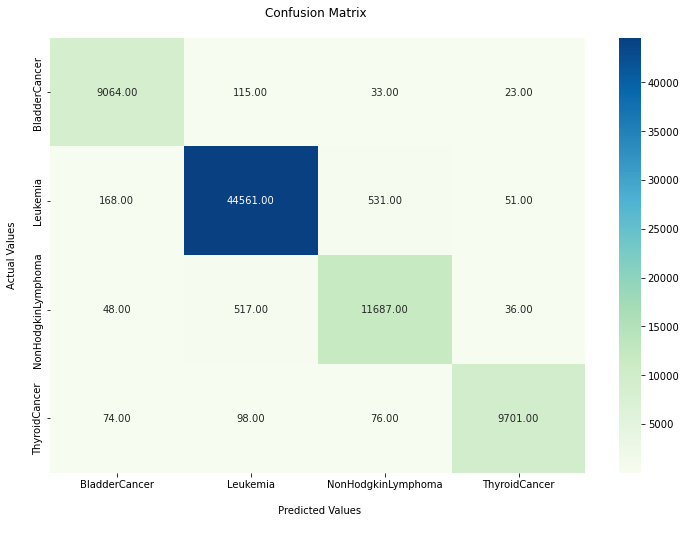

In [28]:
import seaborn as sns
plt.figure(figsize=(12,8))
fx=sns.heatmap(confusion_matrix(y_test,classes_x), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['BladderCancer', 'Leukemia', 'NonHodgkinLymphoma', 'ThyroidCancer'])
fx.yaxis.set_ticklabels(['BladderCancer', 'Leukemia', 'NonHodgkinLymphoma', 'ThyroidCancer'])
plt.show()

In [29]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predict_x, multi_class='ovr')
print("AUC:", auc)


AUC: 0.9981472893255569


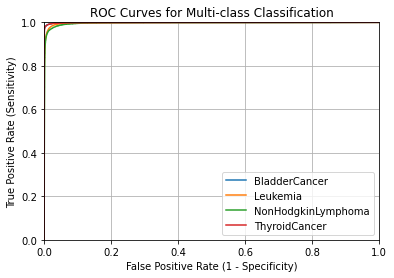

In [31]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

y_pred_proba = predict_x

# For each class
for i in range(y_pred_proba.shape[1]):
    # Get true labels and predicted probabilities for the current class
    y_test_binary = (y_test == i).astype(int)
    y_pred_proba_binary = y_pred_proba[:, i]

    # Get false positive rate, true positive rate and thresholds
    fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_proba_binary)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=le.classes_[i])

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title("ROC Curves for Multi-class Classification")
plt.xlabel("False Positive Rate (1 - Specificity)")
plt.ylabel("True Positive Rate (Sensitivity)")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()
